# Optimization Techniques in FAISS: Product Quantization

**pip install faiss-cpu**

Source: 

Vedashree Patil, Understanding FAISS : Part 2
Compression Techniques and Product Quantization
https://medium.com/dotstar/understanding-faiss-part-2-79d90b1e5388

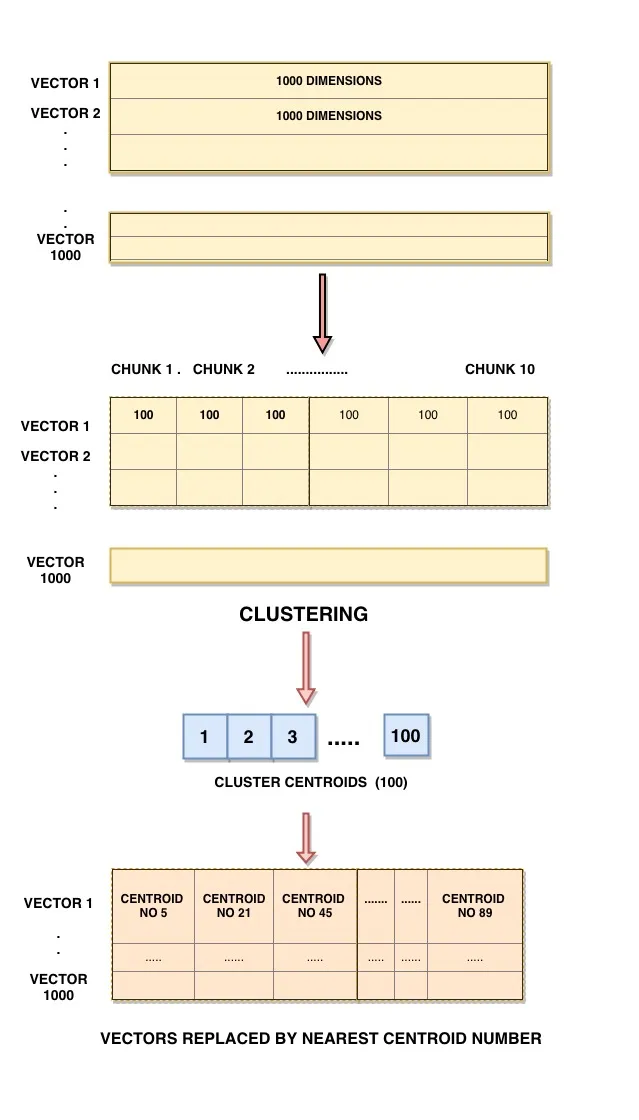

In [1]:
from IPython.display import Image
Image("figures/product_quant.png", width=400, height=200)

In [2]:
# IMPORT LIBRARIES
import faiss
import numpy as np

ModuleNotFoundError: No module named 'faiss'

In [ ]:
dimension = 128    # dimensions of each vector                         
n = 10000           # number of vectors                   
np.random.seed(1)             
db_vectors = np.random.random((n, dimension)).astype('float32')

#### Define the index:

In [ ]:
m = 8
nlist = 5  # number of clusters
quantizer = faiss.IndexFlatL2(dimension)  # coarse quantizer
 
#define the inverted index 
index = faiss.IndexIVFPQ(quantizer, dimension, nlist, m, 8)

#### Train index on the database vectors:

In [ ]:
index.train(db_vectors)
index.add(db_vectors)

#### Query the index for obtaining the most similar dataset vectors for given query vectors:

In [ ]:
nprobe = 2  # find 2 most similar clusters
n_query = 10
k = 3  # return 3 nearest neighbours,
np.random.seed(0)   
query_vectors = np.random.random((n_query, dimension)).astype('float32')
distances, indices = index.search(query_vectors, k)
print(distances)
print(indices)

### Conclusion

**Pro:**
Product quantization is a great way to compress your large data set vectors to enable faster search results.

**Con:**
This also affects the accuracy of the results returned. 

The trade-off between accuracy and memory constraints (or speed) should be critically analyzed while choosing any index in FAISS.

### Additional Reading

Part 1: Understanding and Using Faiss: An Intro
https://medium.com/@aisagescribe/part-1-understanding-and-using-faiss-an-intro-6429297cb655#:~:text=Faiss%20is%20a%20powerful%20library,generated%20from%20machine%20learning%20models.